#Importing necessary libraries & data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as kmeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
!pip install kneed
from kneed import KneeLocator

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/data file/Programming dataset")
df_loan = pd.read_csv("df_loan_new.csv")
df_loan.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,self_employed_Yes,loan_status_Approved
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,0
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,0
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0


# Transform the data

In [ ]:
df_loan = pd.read_csv("df_loan_new.csv")

In [ ]:
df_loan.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,self_employed_Yes,loan_status_Approved
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4269.000000
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.502225,0.503631,0.622160
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.500054,0.500045,0.484904
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000,0.000000,0.000000
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000,0.000000,0.000000
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000,1.000000,1.000000
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000,1.000000,1.000000
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000,1.000000,1.000000


In [ ]:
df_loan.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_Graduate', 'self_employed_Yes', 'loan_status_Approved'],
      dtype='object')

In [ ]:
df_loan['debt_to_income'] = (df_loan['loan_amount']/df_loan['loan_term'])/(df_loan['income_annum']/12)

In [ ]:
zscore_std = StandardScaler()
transform_col = ['income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
for col in transform_col:
    df_loan[col +'_std'] = zscore_std.fit_transform(df_loan[[col]])
df_loan.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,...,loan_status_Approved,debt_to_income,income_annum_std,loan_amount_std,loan_term_std,cibil_score_std,residential_assets_value_std,commercial_assets_value_std,luxury_assets_value_std,bank_asset_value_std
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,...,1,3.114583,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,...,0,4.463415,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,...,0,1.958242,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,...,0,5.615854,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,...,0,1.481633,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172


In [ ]:
std_col = [col for col in df_loan.columns if '_std' in col]
df_loan[std_col].head()

,income_annum_std,loan_amount_std,loan_term_std,cibil_score_std,residential_assets_value_std,commercial_assets_value_std,luxury_assets_value_std,bank_asset_value_std
0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304
1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936
2,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316
3,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533
4,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172


# Principal Component Analysis

First, we need to determine the optimal number of principal components.

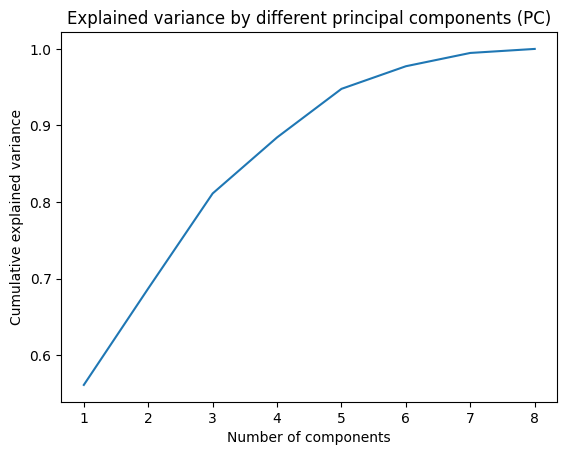

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(df_loan[std_col])

# Plotting the cumulative summation of the explained variance
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by different principal components (PC)')
plt.show()

Using the elbow method, it could be seen that n_component = 5 would be the optimal selection of number of principal components. The result would be validated again using kneed library.


The optimal number of components is: 5




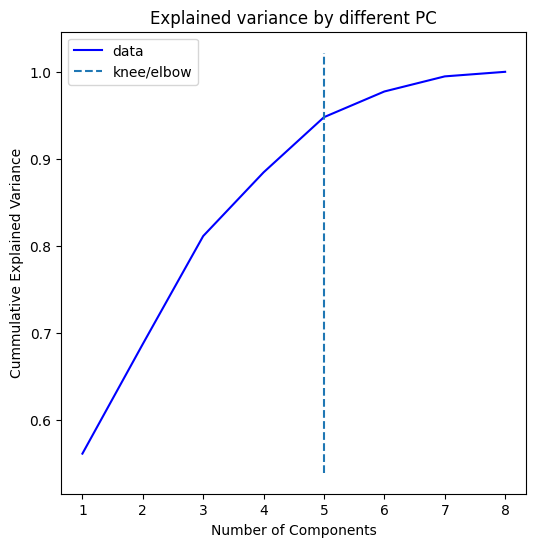

In [ ]:
knl = KneeLocator(range(1, len(pca.explained_variance_ratio_) + 1),
                  np.cumsum(pca.explained_variance_ratio_))
optimal_pca_comp = knl.elbow
print(f'\nThe optimal number of components is: {optimal_pca_comp}\n\n')
knl.plot_knee(title='Explained variance by different PC',
                      xlabel='Number of Components',
                      ylabel= 'Cummulative Explained Variance')

Using the optimal number of components, pca is applied in order to decrease the dimension of the analyzed metrics, as well as solve the multicollinearity within the datset before using k-mean cluster to segment the customers based on the financial metrics.

In [ ]:
pca = PCA(optimal_pca_comp)

df_loan[[f'financial_metrics_pca_{i+1}' for i in range(optimal_pca_comp)]] = pca.fit_transform(df_loan[std_col])

# df_loan = df_loan.drop(columns = std_col, axis = 1)

df_loan.head(2)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,...,cibil_score_std,residential_assets_value_std,commercial_assets_value_std,luxury_assets_value_std,bank_asset_value_std,financial_metrics_pca_1,financial_metrics_pca_2,financial_metrics_pca_3,financial_metrics_pca_4,financial_metrics_pca_5
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,...,1.032792,-0.780058,2.877289,0.832028,0.930304,2.918862,0.877545,0.748239,-2.521388,0.388141
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,...,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,-1.271233,-1.105708,-0.427411,-0.128137,-0.363304


# Segmenting the customer using K-mean Clustering method

Using elbow method again to esstimate the optimal number of clusters for k-mean method

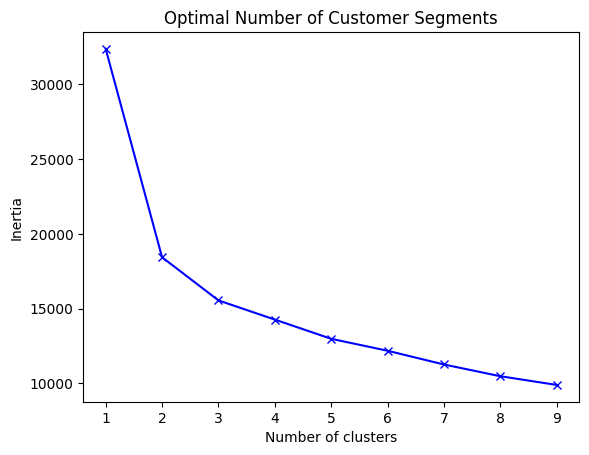

In [ ]:
def optimal_kmeans_cluster(data, max_k):
  cluster_no= []
  inertia = []
  for i in range(1, max_k):
    kmeans_opt = kmeans(n_clusters=i, random_state=42)
    kmeans_opt.fit(df_loan[[f'financial_metrics_pca_{i+1}' for i in range(optimal_pca_comp)]])
    cluster_no.append(i)
    inertia.append(kmeans_opt.inertia_)

  plt.plot(cluster_no, inertia, 'bx-')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.title('Optimal Number of Customer Segments')
  plt.show()
optimal_kmeans_cluster(df_loan, 10)


When approving a loan, banks usually classified the customers into 3 or more segments. Considering this is a small dataset, the customers would only be segmented into **3 groups**.

In [ ]:
n_clusters = 3

# Applying kmeans clustering
kmeans_pca = kmeans(n_clusters=n_clusters, random_state=42)
kmeans_pca.fit(df_loan[[f'financial_metrics_pca_{i+1}' for i in range(optimal_pca_comp)]])

# The cluster labels for each data point
df_loan['kmean_cluster'] = kmeans_pca.labels_
df_loan.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,...,residential_assets_value_std,commercial_assets_value_std,luxury_assets_value_std,bank_asset_value_std,financial_metrics_pca_1,financial_metrics_pca_2,financial_metrics_pca_3,financial_metrics_pca_4,financial_metrics_pca_5,kmean_cluster
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,...,-0.780058,2.877289,0.832028,0.930304,2.918862,0.877545,0.748239,-2.521388,0.388141,1
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,...,-0.733924,-0.631921,-0.694993,-0.515936,-1.271233,-1.105708,-0.427411,-0.128137,-0.363304,2
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,...,-0.057300,-0.107818,1.996520,2.407316,3.209668,0.798384,-1.503918,-0.199645,-1.928199,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,...,1.649637,-0.381263,0.897943,0.899533,2.473029,-0.893127,-0.218889,1.400551,-0.421732,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,...,0.757724,0.735304,1.568075,0.007172,2.441657,0.259512,-1.987396,-0.004024,0.105892,1


In [ ]:
financial_profile_df = pd.DataFrame(data=df_loan.groupby('kmean_cluster')[transform_col+['no_of_dependents','loan_status_Approved']].mean())
financial_profile_df = financial_profile_df.reset_index()
financial_profile_df.columns = ['cluster'] + ['income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
      'no_of_dependents','loan_status_Approved']
financial_profile_df

,cluster,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,no_of_dependents,loan_status_Approved
0,0,5.432308e+06,1.597077e+07,10.660256,591.264744,7.118141e+06,4.827821e+06,1.604494e+07,5.254872e+06,2.569231,0.594872
1,1,8.352061e+06,2.543735e+07,11.102668,598.313662,1.363727e+07,9.076637e+06,2.543379e+07,8.450606e+06,2.481002,0.632175
2,2,1.896399e+06,5.587160e+06,10.985054,610.489130,2.667799e+06,1.678804e+06,5.490829e+06,1.762568e+06,2.438859,0.642663


In [ ]:
df_average = pd.DataFrame
df_average = df_loan[['income_annum',
                    'loan_amount',
                    'loan_term',
                    'cibil_score',
                    'residential_assets_value',
                    'commercial_assets_value',
                    'luxury_assets_value',
                    'bank_asset_value',
                    'no_of_dependents',
                    'loan_status_Approved']].mean()
df_average = pd.DataFrame(df_average).T
df_average.insert(0, 'cluster', 'AVG')
df_average

,cluster,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,no_of_dependents,loan_status_Approved
0,AVG,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,2.498712,0.62216


In [ ]:
financial_profile_df = pd.concat([financial_profile_df, df_average])
financial_profile_df

,cluster,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,no_of_dependents,loan_status_Approved
0,0,5.432308e+06,1.597077e+07,10.660256,591.264744,7.118141e+06,4.827821e+06,1.604494e+07,5.254872e+06,2.569231,0.594872
1,1,8.352061e+06,2.543735e+07,11.102668,598.313662,1.363727e+07,9.076637e+06,2.543379e+07,8.450606e+06,2.481002,0.632175
2,2,1.896399e+06,5.587160e+06,10.985054,610.489130,2.667799e+06,1.678804e+06,5.490829e+06,1.762568e+06,2.438859,0.642663
0,AVG,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,2.498712,0.622160


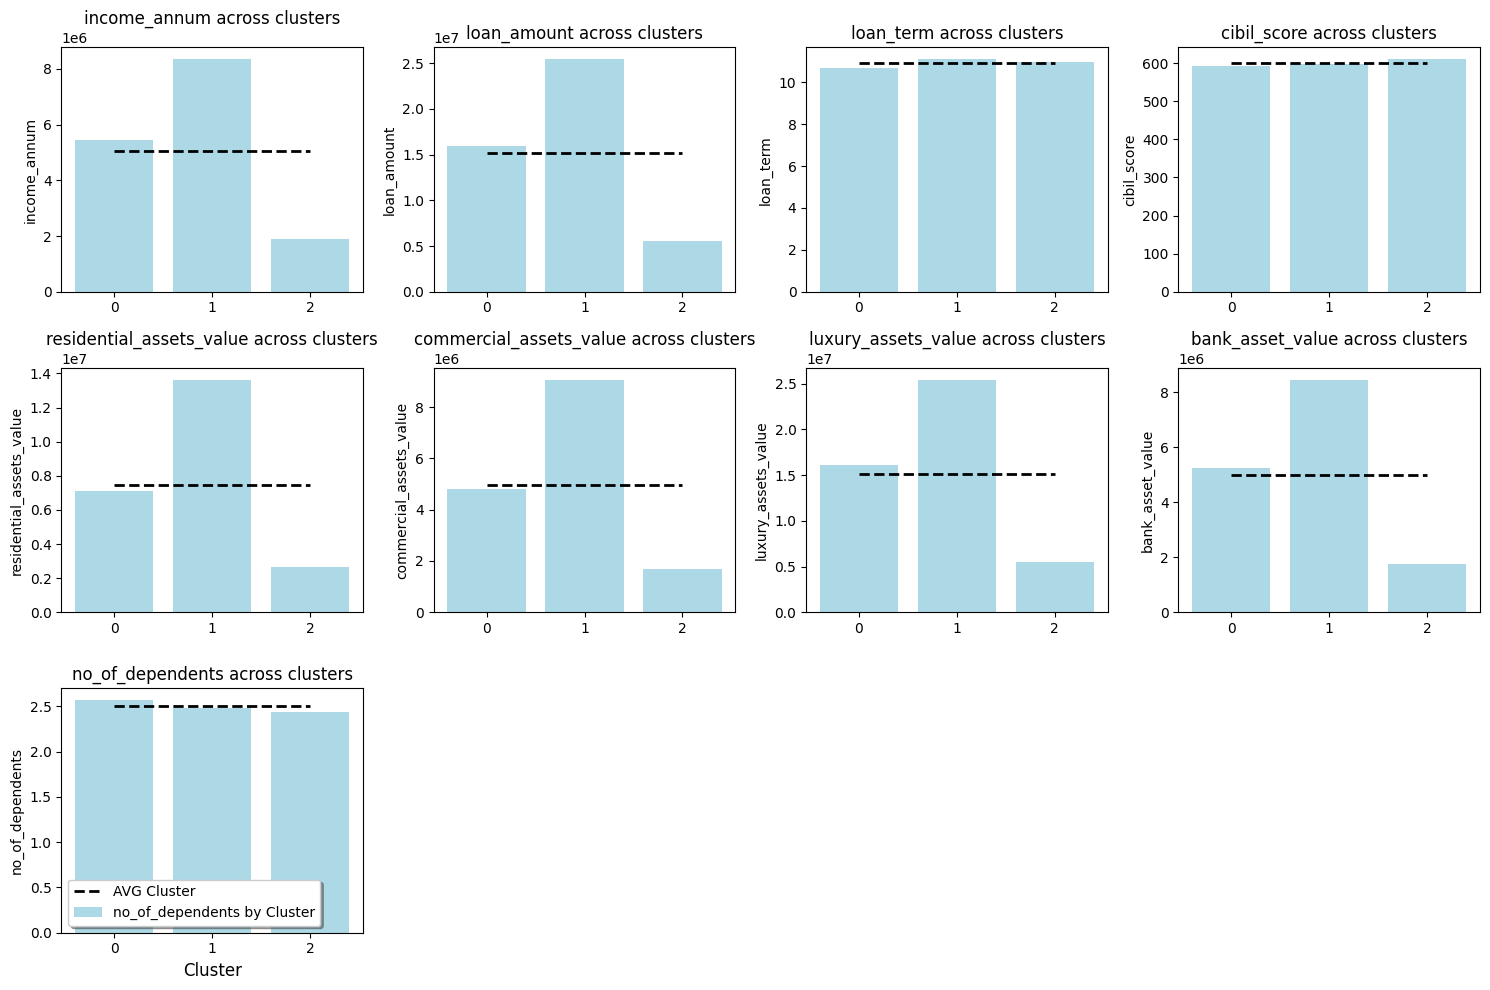

In [ ]:
columns = financial_profile_df.columns[1:-1]
avg_values = financial_profile_df[financial_profile_df['cluster'] == 'AVG']
clusters = financial_profile_df[financial_profile_df['cluster'] != 'AVG']

fig, axes = plt.subplots(3, len(columns) // 2, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    ax.bar(clusters['cluster'], clusters[column].astype(float), color='lightblue', label=f'{column} by Cluster')
    avg_value = avg_values[column].values[0]
    ax.plot(['0', '1', '2'], [avg_value] * len(clusters), color='black', linestyle='--', label='AVG Cluster', linewidth=2)
    ax.set_ylabel(column, fontsize=10)
    ax.set_title(f'{column} across clusters', fontsize=12)


if len(axes) > len(columns):
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

plt.xlabel("Cluster", fontsize=12)
axes[len(columns)-1].legend(loc='lower left',  shadow=True, ncol=1)
plt.tight_layout()
plt.show()

In [ ]:
save_financial_profile = financial_profile_df.to_csv('financial_profile.csv', index=False)

**Customer Segmentation:**

1. Cluster 0 (balanced financial profile):
* Income and loan amount: slightly above the dataset mean.
Loan term: near the average.
* Cibil score: slightly below the mean, indicating lower-than-average creditworthiness.
* Assets: values are close to the dataset mean, showing an average financial profile with balanced residential, commercial, luxury, and bank assets.

-> Summary: represents borrowers with moderate income, loans, and assets. They may reflect a typical middle-tier group with decent financial stability.

2. Cluster 1 (wealthiest group):
* Income and loan amount: far above average, indicating this group consists of high-income earners requesting or receiving high-value loans.
* Loan term: slightly above average, indicating longer-term loans for high-value transactions.
* Cibil score: near the mean, suggesting average creditworthiness despite high financial capability.
* Assets: well above the mean in all categories (residential, commercial, luxury, and bank assets), showcasing strong financial portfolios.

-> Summary: represents the wealthiest and most financially secure borrowers with high-value loans and significant asset holdings. Likely the least risky group from a lender’s perspective due to their overall financial capacity.

3. Cluster 2 (low financial resources):
* Income and loan amount: far below the mean, indicating this group includes low-income borrowers requesting or receiving smaller loans.
* Loan term: near the average, similar to other groups.
* Cibil score: above average, suggesting better creditworthiness despite limited financial resources.
* Assets: far below average across all categories, indicating limited residential, commercial, luxury, and bank assets.

-> Summary: represents low-income individuals with limited assets but slightly better credit scores. This group may include conservative borrowers who pose lower credit risks despite their weaker financial portfolios.